# Orthogonal Decomposition Example

We will find the best approximation of e^t by a second degree polynomial.

In [1]:
import sympy
sympy.init_printing()
import matplotlib.pyplot as plt
import numpy as np

In [2]:
t = sympy.symbols('t', real=True)

In [3]:
class L2:
    """
    Defines an inner product space, Lebesgue space, for functions
    whose 2nd-power of the absolute value is Lebesque integrable.
    
    L2 is the only Hilbert space among Lebesgue spaces.
    Hilbert space have the concept of angle and distance and are complete
    so that the stadard notions of calculus can be applied.
    
    https://en.wikipedia.org/wiki/Lp_space
    """
    
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def inner_product(self, f, g):
        a = self.a
        b = self.b
        return sympy.integrate(f*sympy.conjugate(g), (t, a, b))/(b - a)
    
    def norm(self, f):
        return self.inner_product(f, f)
    
    def distance(self, f, g):
        return self.norm(f - g)

In [4]:
S = L2(0, 1)

In [5]:
F = sympy.Matrix([1, t, t**2, t**3, t**4]).T
F

⎡       2   3   4⎤
⎣1  t  t   t   t ⎦

In [6]:
G = sympy.Matrix([
    [S.inner_product(F[i], F[j])
    for i in range(len(F))]
    for j in range(len(F))
])
G

⎡ 1   1/2  1/3  1/4  1/5⎤
⎢                       ⎥
⎢1/2  1/3  1/4  1/5  1/6⎥
⎢                       ⎥
⎢1/3  1/4  1/5  1/6  1/7⎥
⎢                       ⎥
⎢1/4  1/5  1/6  1/7  1/8⎥
⎢                       ⎥
⎣1/5  1/6  1/7  1/8  1/9⎦

In [7]:
f = sympy.Piecewise(
    (0, t < 0.5),
    (1, t >= 0.5 )
)
f = sympy.exp(t)

def project(S, F, f):
    """
    see: https://engineering.purdue.edu/AAECourses/aae567/2016/probability.pdf
    for details on the math, Theorem 4.3.2
    pg. 129
    """
    X = sympy.Matrix([[S.inner_product(F[i], f) for i in range(len(F))]])
    C = X*G.inv()
    f_approx = (C*F.T)[0]
    return f_approx

In [8]:
f_approx = project(S, F, f)
f_approx

In [9]:
sympy.N(f_approx)

In [10]:
def sym_eval(f, t_eval):
    return sympy.lambdify((t), (sympy.N(f)))(t_eval)

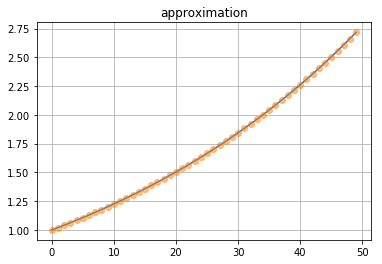

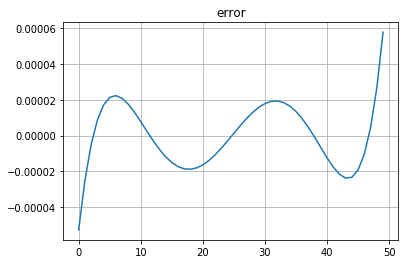

In [11]:
def plotting():
    t_eval = np.linspace(0, 1)
    
    plt.figure()
    plt.title('approximation')
    plt.plot(sym_eval(f_approx, t_eval))
    plt.plot(sym_eval(f, t_eval), 'o', alpha=0.5)
    plt.grid()
    
    plt.figure()
    plt.title('error')
    plt.plot(sym_eval(f - f_approx, t_eval))
    plt.grid()
    
plotting()